This notebook demonstrates example useage for the `make_multi_cmap_heatmap` in visual_behavior.plotting.  

This function makes it possible to generate a single heatmap with multiple colormaps, each with a defined scale.  

This would allow, for example, categorical data to be visualized next to continuously varying values.  

Doug Ollerenshaw  
dougo@alleninstitute.org  
8/20/2020

In [2]:
import visual_behavior.plotting as vbp
import pandas as pd
import numpy as np

In [3]:
%matplotlib notebook

# Generate sample data
The data will consist of:
    * 6 columns of uniformly sampled numbers between -1 and 1
    * 1 column of binary data (0 or 1)
    * 2 columns of randomly chosen numbers ranging from 0 to 100
    * 1 row of categorical data, with three possible category labels (0, 1, 2)

In [5]:
size=20
np.random.seed(0)

# add 10 rows of mean-zero random data
data_dict = {'var_{}'.format(i):np.random.randn(size) for i in range(6)}

# add some additional rows with very different scales
data_dict.update({
    'binary':np.random.choice([0,1],size=size),
    'hundreds_1': np.random.choice(np.arange(0,100),size=size),
    'hundreds_2': np.random.choice(np.arange(0,100),size=size),
    'three_categories': np.random.choice([0,1,2],size=size)
})

# convert to a dataframe
df = pd.DataFrame(data_dict)
df

,var_0,var_1,var_2,var_3,var_4,var_5,binary,hundreds_1,hundreds_2,three_categories
0,1.764052,-2.552990,-1.048553,-0.672460,-1.165150,1.883151,0,20,71,1
1,0.400157,0.653619,-1.420018,-0.359553,0.900826,-1.347759,1,53,39,1
2,0.978738,0.864436,-1.706270,-0.813146,0.465662,-1.270485,0,29,61,1
3,2.240893,-0.742165,1.950775,-1.726283,-1.536244,0.969397,0,67,85,0
4,1.867558,2.269755,-0.509652,0.177426,1.488252,-1.173123,0,35,97,0
5,-0.977278,-1.454366,-0.438074,-0.401781,1.895889,1.943621,0,39,44,0
6,0.950088,0.045759,-1.252795,-1.630198,1.178780,-0.413619,1,9,34,0
7,-0.151357,-0.187184,0.777490,0.462782,-0.179925,-0.747455,1,73,34,0
8,-0.103219,1.532779,-1.613898,-0.907298,-1.070753,1.922942,1,41,88,0
9,0.410599,1.469359,-0.212740,0.051945,1.054452,1.480515,0,23,33,1


# Plot with standard heatmap
Plotting with the standard seaborn heatmap function doesn't allow for setting independent color scales for each column

<IPython.core.display.Javascript object>


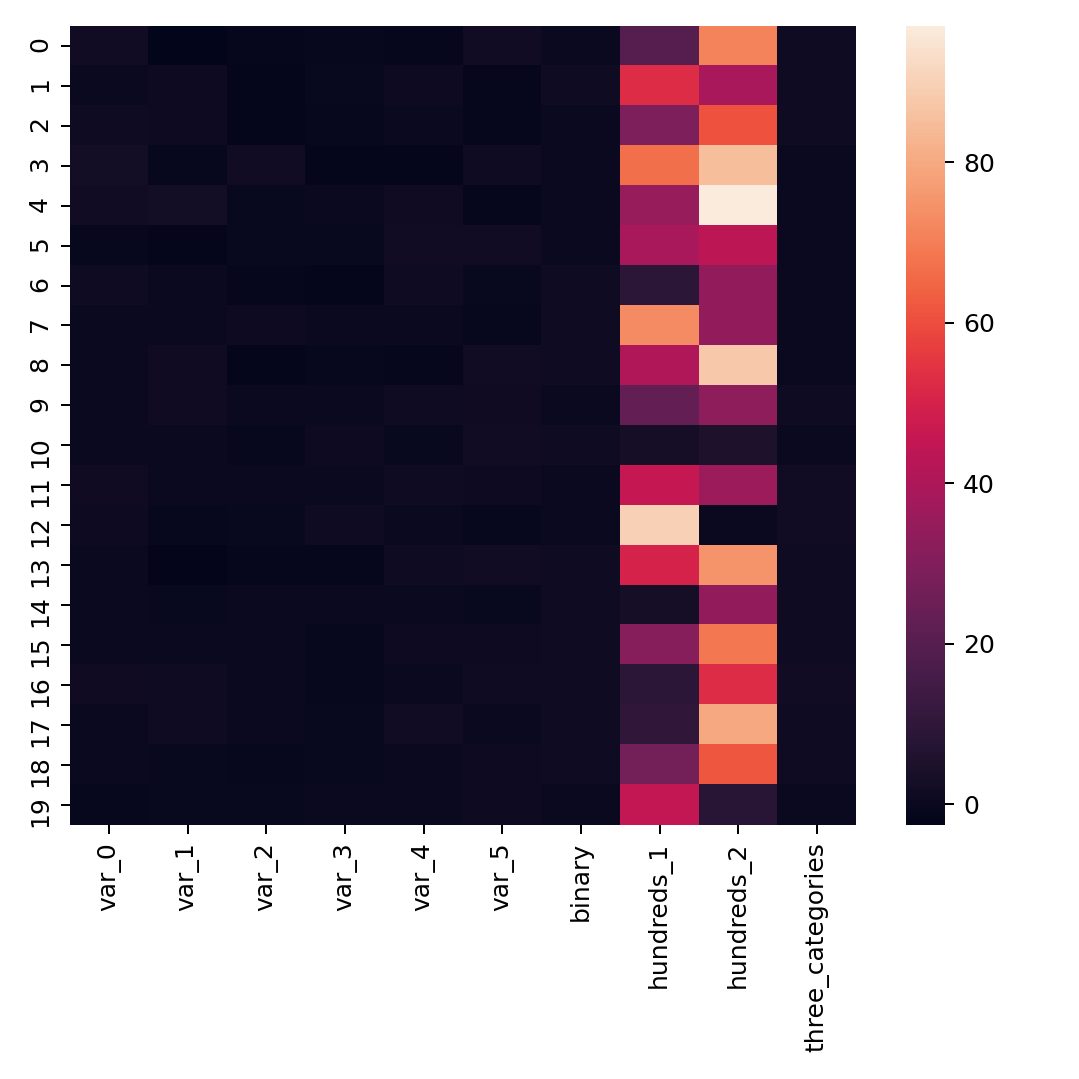

In [6]:
fig,ax=plt.subplots(figsize=(6,6))
im = sns.heatmap(
    df,
    ax=ax
)
fig.tight_layout()

# Use the `make_multi_cmap_heatmap` function

The function requires a list of dictionaries specifying the attributes for each block of the heatmap (see the docstring)  

Here's one example useage for the data defined above:

<IPython.core.display.Javascript object>


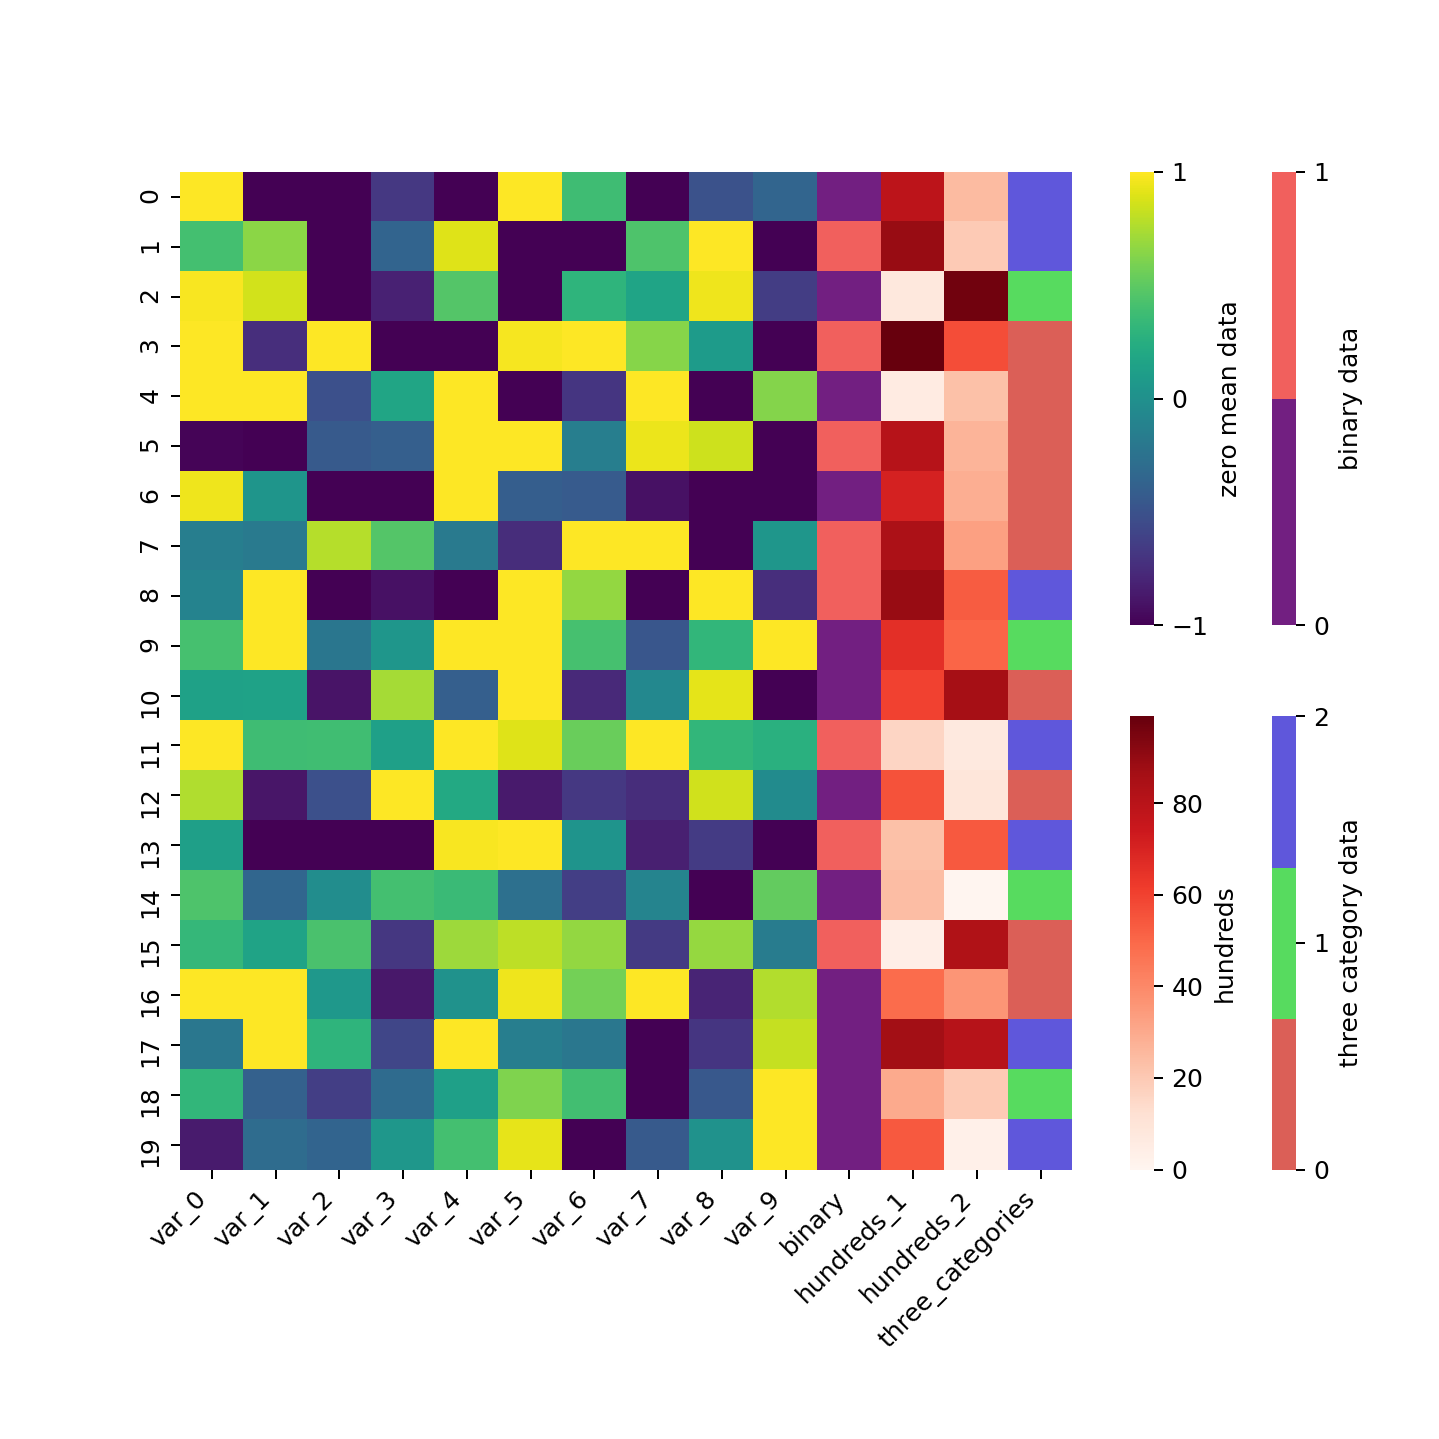

In [6]:
col_defs = [
    {
        'columns':[col for col in df if col.startswith('var')],
        'cbar_label':'zero mean data',
        'cbar_ticks':[-1,0,1],
        'vmin':-1,
        'vmax':1,
        'cmap':'viridis',
    },
    {
        'columns':['binary'],
        'cbar_label':'binary data',
        'cbar_ticks':[0,1],
        'cmap':sns.color_palette("magma", 2)
    },
    {
        'columns':['hundreds_1','hundreds_2'],
        'cbar_label':'hundreds',
        'cmap':'Reds'
    },
    {
        'columns':['three_categories'],
        'cbar_label':'three category data',
        'cbar_ticks':[0,1,2],
        'cmap':sns.color_palette("hls", 3)
    },
]

fig, axes = vbp.make_multi_cmap_heatmap(df, col_defs, figsize=(8,8), top_buffer=0, bottom_buffer=0.1)

Alternatively, we could separate the two 'hundreds' columns so that they each use a unique colormap, and also set the number of rows of colorbars to 3 (from the default of 2)

<IPython.core.display.Javascript object>


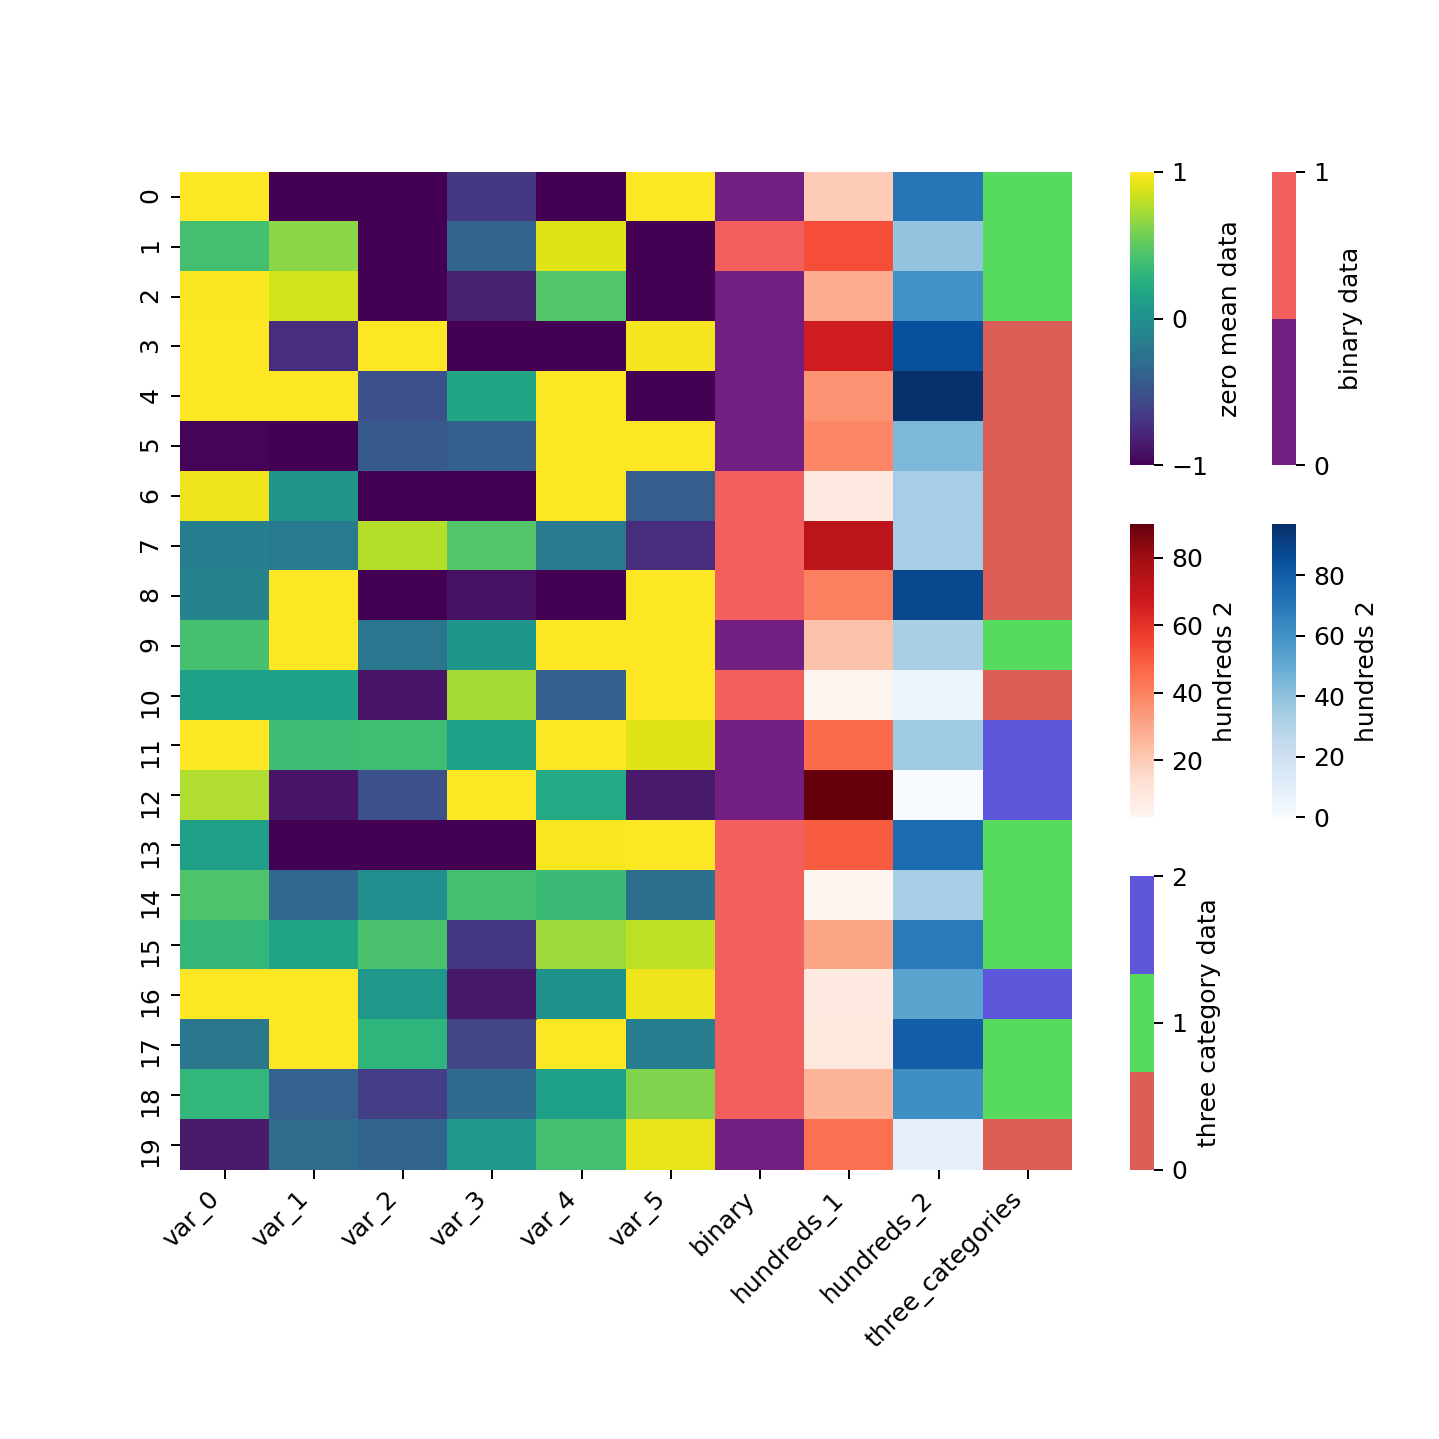

In [8]:
col_defs = [
    {
        'columns':[col for col in df if col.startswith('var')],
        'cbar_label':'zero mean data',
        'cbar_ticks':[-1,0,1],
        'vmin':-1,
        'vmax':1,
        'cmap':'viridis',
    },
    {
        'columns':['binary'],
        'cbar_label':'binary data',
        'cbar_ticks':[0,1],
        'cmap':sns.color_palette("magma", 2)
    },
    {
        'columns':['hundreds_1'],
        'cbar_label':'hundreds 2',
        'cmap':'Reds'
    },
    {
        'columns':['hundreds_2'],
        'cbar_label':'hundreds 2',
        'cmap':'Blues'
    },
    {
        'columns':['three_categories'],
        'cbar_label':'three category data',
        'cbar_ticks':[0,1,2],
        'cmap':sns.color_palette("hls", 3)
    },
]

fig, axes = vbp.make_multi_cmap_heatmap(df, col_defs, figsize=(8,8), top_buffer=0, bottom_buffer=0.1,n_cbar_rows=3)